In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data=pd.read_csv("train.csv")

In [3]:
# first 5 rows
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

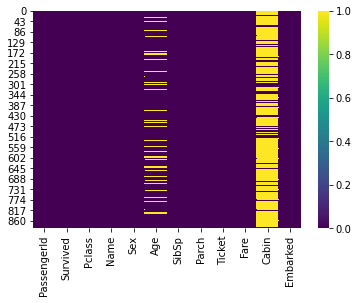

In [8]:
sns.heatmap(titanic_data.isnull(),cmap='viridis')

# How many people surivived and how many were alive?

In [9]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

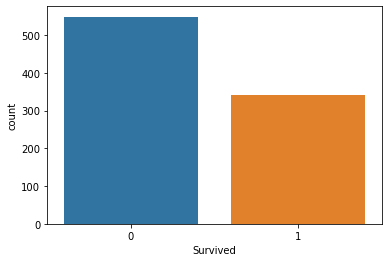

In [10]:
sns.countplot(x='Survived',data=titanic_data)

In [11]:
# How many Males and Females were travelling in that ship?
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

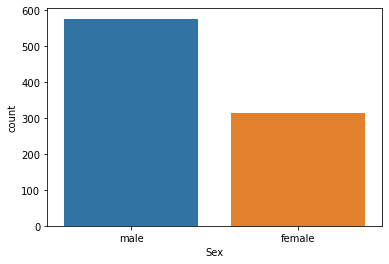

In [12]:
sns.countplot(x='Sex',data=titanic_data)

## How many Females and Males were survived?

In [13]:
titanic_data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [14]:
titanic_data.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

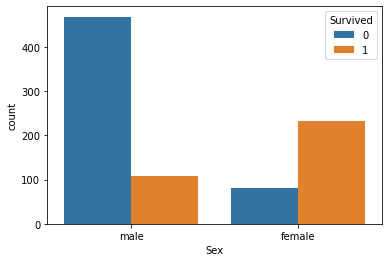

In [15]:
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## What is the survival rate if the person is a male?

In [17]:
# Survival Rate= How many male were alived / Total number of males?
titanic_data.groupby('Sex')['Survived'].value_counts()[3]/titanic_data['Sex'].value_counts()[0]*100

18.890814558058924

In [18]:
109/577*100

18.890814558058924

## What are the Survival Rate for females?

In [19]:
# Survival Rate= How many female were alived / Total number of Females?
titanic_data.groupby('Sex')['Survived'].value_counts()[0]/titanic_data['Sex'].value_counts()[1]*100

74.20382165605095

In [20]:
233/314*100

74.20382165605095

## How many Females and Males Travelling in different Pclass?

In [21]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
titanic_data.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

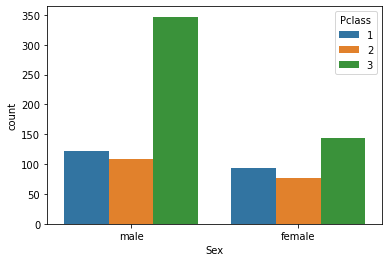

In [23]:
sns.countplot(x='Sex',hue='Pclass',data=titanic_data)

In [24]:
# Check the Fare Price for different classes
titanic_data.groupby('Pclass')['Fare'].value_counts()

Pclass  Fare   
1       26.5500    15
        52.0000     7
        0.0000      5
        30.0000     5
        30.5000     5
                   ..
3       15.5500     1
        17.4000     1
        21.6792     1
        22.0250     1
        22.5250     1
Name: Fare, Length: 255, dtype: int64

In [25]:
# Check the Fare Price for different classes
titanic_data.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [26]:
# Check the Fare Price for different classes
titanic_data.groupby('Pclass')['Fare'].sum()

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

In [27]:
titanic_data.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

# Assignment-1 :  How many People were travelling Alone? What's thier Survival Rate
# Hint: The people was travelling alone has 0 Sibsp and 0 Parch.

In [28]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
alone=titanic_data[(titanic_data['Parch']==0) & (titanic_data['SibSp']==0)]

In [30]:
alone.shape[0]

537

In [31]:
alone.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [32]:
alone['Survived'].value_counts()

0    374
1    163
Name: Survived, dtype: int64

In [33]:
# Survival Rate= Number of people alive/Total number of people
alone['Survived'].value_counts()[1]/alone.shape[0]*100

30.353817504655495

In [34]:
163/537*100

30.353817504655495

In [35]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## How many people was survived travelling in different Passenger Classes based on gender?

In [36]:
titanic_data.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

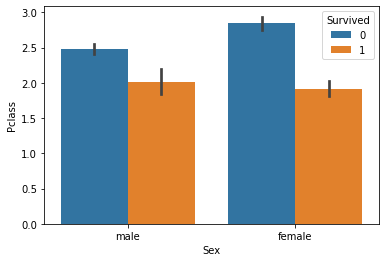

In [37]:
sns.barplot(x='Sex',y='Pclass',hue='Survived',data=titanic_data)

<AxesSubplot:xlabel='Pclass,Sex,Survived'>

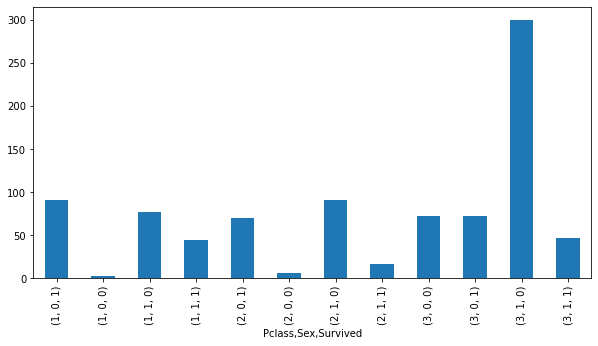

In [94]:
plt.figure(figsize=(10,5))
titanic_data.groupby(['Pclass','Sex'])['Survived'].value_counts().plot(kind='bar')

## Which Passenger Class Contains more Fare in the basis of gender?

In [39]:
titanic_data.groupby(['Pclass','Sex'])['Fare'].mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Pclass,Sex'>

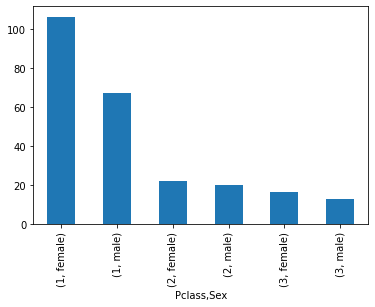

In [40]:
titanic_data.groupby(['Pclass','Sex'])['Fare'].mean().plot(kind='bar')

In [41]:
Fare_Gender=titanic_data.groupby(['Pclass','Sex'])['Fare'].mean().reset_index()

In [42]:
Fare_Gender

,Pclass,Sex,Fare
0,1,female,106.125798
1,1,male,67.226127
2,2,female,21.970121
3,2,male,19.741782
4,3,female,16.118810
5,3,male,12.661633


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

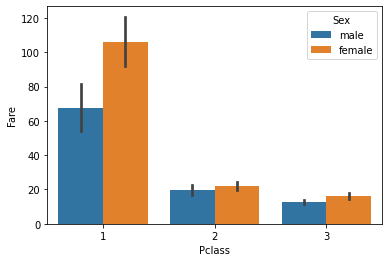

In [43]:
sns.barplot(x='Pclass',y='Fare',hue='Sex',data=titanic_data)

# Assignment-02: What is the Survival rate of the person travelling in Pclass 1 and Having an Embarked Q

In [44]:
Pclass_Embarked=titanic_data[(titanic_data['Pclass']==1) & (titanic_data['Embarked']=='Q')]

In [45]:
Pclass_Embarked['Survived'].value_counts()[0]/Pclass_Embarked['Survived'].count()

0.5

In [46]:
Pclass_Embarked['Survived'].value_counts(normalize=True)

1    0.5
0    0.5
Name: Survived, dtype: float64

In [47]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# How many Children were travelling?

In [48]:
child=titanic_data[titanic_data['Age']<18]
adult=titanic_data[titanic_data['Age']>18]

In [49]:
child.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


In [50]:
adult.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
child['Age'].count()

113

In [52]:
adult['Age'].count()

575

# What is the Survival rate of Female children?

In [53]:
child['Survived'].value_counts()

1    61
0    52
Name: Survived, dtype: int64

In [54]:
child.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.690909
        0           0.309091
male    0           0.603448
        1           0.396552
Name: Survived, dtype: float64

# Assignment-03: a) How many Children were travelling Alone and what's thier Survival Rate? 
# b) How many Adults were travelling with a fare more than 100 and in a Embarked of S?


In [55]:
# How many Childs were travelling alone?
child[(child['SibSp']==0) & (child['Parch']==0)].shape[0]

23

In [56]:
child[(child['SibSp']==0) & (child['Parch']==0)]['Survived'].value_counts()

0    13
1    10
Name: Survived, dtype: int64

In [57]:
child[(child['SibSp']==0) & (child['Parch']==0)]['Survived'].value_counts(normalize=True)

0    0.565217
1    0.434783
Name: Survived, dtype: float64

In [58]:
# How many Adults were travelling with a fare more than 100 and in a Embarked of S?
adult[(adult['Fare']>100) & (adult['Embarked']=='S')].shape[0]

17

In [59]:
adult[(adult['Fare']>100) & (adult['Embarked']=='S')]['Survived'].value_counts(normalize=True)

1    0.764706
0    0.235294
Name: Survived, dtype: float64

# Data Cleaning

In [60]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [62]:
# FulFill the Embarked with the mode because it's categorical
titanic_data['Embarked'].fillna('S',inplace=True)

In [63]:
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [64]:
# Drop the column of Cabin? Beacuse it's difficult to predict/guess the 687 rows/instances
titanic_data.drop(['Cabin'],axis=1,inplace=True)

In [65]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [66]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [67]:
titanic_data['Age'].mean()

29.69911764705882

In [68]:
titanic_data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [69]:
def imput_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38.233
        if Pclass==2:
            return 29.877
        if Pclass==3:
            return 25.140
    else:
        return Age

In [70]:
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(imput_age,axis=1)

In [71]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# One Hot Encoding
# You need to Convert Categorical values into Numerical ones

In [72]:
# One hot Encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
titanic_data['Sex']=lb.fit_transform(titanic_data["Sex"])

In [73]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [74]:
titanic_data['Embarked']=lb.fit_transform(titanic_data["Embarked"])

In [75]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


# Feature Engineering

In [76]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.035256,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.050502,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.403861,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.080463,-0.114631,-0.245489,-0.182333,0.108262
Age,0.035256,-0.050502,-0.403861,0.080463,1.000000,-0.243452,-0.175796,0.120888,-0.016620
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.243452,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.175796,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.120888,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.016620,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

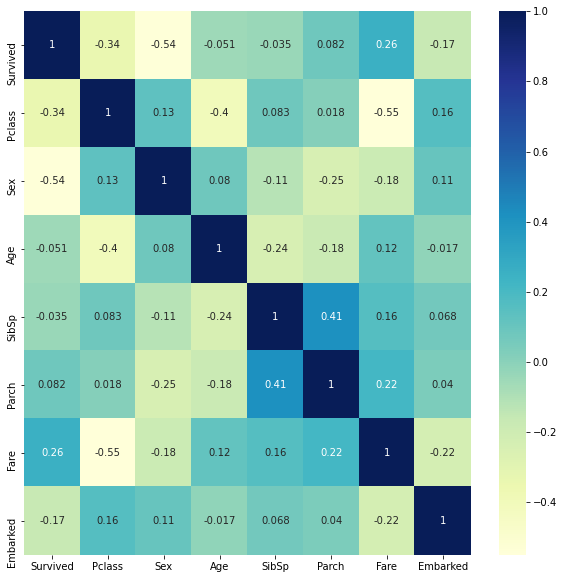

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic_data.corr(),annot=True,cmap='YlGnBu')

In [78]:
titanic_data.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [79]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Model Building

In [80]:
X=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [81]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [84]:
X_train.shape

(712, 7)

In [85]:
X_test.shape

(179, 7)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model=LogisticRegression()

In [88]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
y_pred=model.predict(X_test)

In [90]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

83.79888268156425